# 导入Overlay

In [4]:
from pynq import Overlay
from pynq import DefaultIP
import math
import numpy
import matplotlib.pyplot as plt
import time

overlay = Overlay('./cordic.bit') #导入overlay

# 定义IP Driver

In [5]:
class cordicDriver(DefaultIP):
    def __init__(self, description):
        super().__init__(description=description)

    bindto = ['xilinx.com:hls:cordic:1.0']

    def cal_sin(self, theta):
        self.write(0x10, theta)
        self.write(0x00,0b1)
        return self.read(0x18)
    
    def cal_cos(self, theta):
        self.write(0x10, theta)
        self.write(0x00, 0b1)
        return self.read(0x28)

# 计算运行时间、分析sin和cos误差

In [10]:
cos_ed = numpy.zeros(shape=(91,1))#计算0-90度之间所有角度，步长为1
sin_ed = numpy.zeros(shape=(91,1))
each_time = numpy.zeros(shape=(91,1))


for angle in range (91):
    theta = angle << 20 #转定点数
    start_time = time.time()
    cos = overlay.cordic_0.cal_cos(theta)
    sin = overlay.cordic_0.cal_sin(theta)
    end_time = time.time()
    each_time[angle] = end_time - start_time
    print("耗时：{}s".format(end_time - start_time))
    cos_bin = bin(cos) #转二进制
    sin_bin = bin(sin)

    cos_dec = 0
    sin_dec = 0
    for index,ch in enumerate (str(cos_bin[2:]),start = 1):
        cos_dec = cos_dec + int(ch) * (2**(-index)) #转十进制小数
    for index,ch in enumerate (str(sin_bin[2:]),start = 1):
        sin_dec = sin_dec + int(ch) * (2**(-index))

    cos_ed[angle] = abs(math.cos(math.radians(angle))-cos_dec) #计算cos error distance
    sin_ed[angle] = abs(math.sin(math.radians(angle))-sin_dec) #计算sin error distance

    #print(cos_ed[angle])
    #print(sin_ed[angle])
ef = each_time.flatten()
total_time = 0
for i in ef:
    total_time = total_time + i
average_time = total_time/91
print("The average running time is" , average_time , "s")


耗时：0.022477388381958008s
耗时：0.0212857723236084s
耗时：0.02105402946472168s
耗时：0.02205038070678711s
耗时：0.0209505558013916s
耗时：0.021080732345581055s
耗时：0.0209197998046875s
耗时：0.0211331844329834s
耗时：0.02083301544189453s
耗时：0.023447751998901367s
耗时：0.021327495574951172s
耗时：0.020901203155517578s
耗时：0.020908117294311523s
耗时：0.020871877670288086s
耗时：0.020743370056152344s
耗时：0.02089214324951172s
耗时：0.020781993865966797s
耗时：0.020900964736938477s
耗时：0.02082538604736328s
耗时：0.023073911666870117s
耗时：0.02158045768737793s
耗时：0.021709918975830078s
耗时：0.021520137786865234s
耗时：0.02156829833984375s
耗时：0.021585941314697266s
耗时：0.021523475646972656s
耗时：0.02167963981628418s
耗时：0.021531105041503906s
耗时：0.02152538299560547s
耗时：0.023869752883911133s
耗时：0.021526336669921875s
耗时：0.021638154983520508s
耗时：0.021512985229492188s
耗时：0.021532058715820312s
耗时：0.021584033966064453s
耗时：0.021547794342041016s
耗时：0.021518230438232422s
耗时：0.021511316299438477s
耗时：0.021481752395629883s
耗时：0.024231672286987305s
耗时：0.021646976470

# 将误差绘制成图像

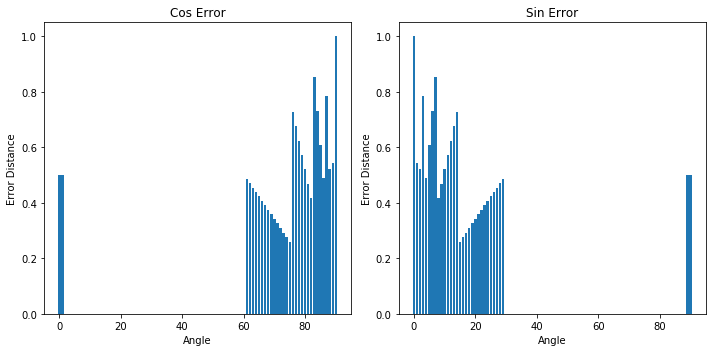

In [7]:
ind=numpy.arange(91)

plt.figure(figsize=(10, 5))
plt.subplot(1,2,1)
plt.bar(ind,cos_ed.flatten())
plt.title("Cos Error")
plt.xlabel("Angle")
plt.ylabel("Error Distance")
#plt.xticks(ind)
plt.tight_layout()

plt.subplot(1,2,2)
plt.bar(ind,sin_ed.flatten())
plt.title("Sin Error")
plt.xlabel("Angle")
plt.ylabel("Error Distance")
#plt.xticks(ind)
plt.tight_layout()